Business Understanding:


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data and see what we have
filename = r"C:\DataMining\flight-delays\flights.csv"
df = pd.read_csv(filename, dtype=object)

# THIS LINE FOR DEVELOPMENT OF PLOTS COMMENT OUT FOR FINAL PRESENTATION
df = df.sample(frac=0.1)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   object
MONTH                  object
DAY                    object
DAY_OF_WEEK            object
AIRLINE                object
FLIGHT_NUMBER          object
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        object
TAXI_OUT               object
WHEELS_OFF             object
SCHEDULED_TIME         object
ELAPSED_TIME           object
AIR_TIME               object
DISTANCE               object
WHEELS_ON              object
TAXI_IN                object
SCHEDULED_ARRIVAL      object
ARRIVAL_TIME           object
ARRIVAL_DELAY          object
DIVERTED               object
CANCELLED              object
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       object
SECURITY_DELAY         object
AIRLINE_DELAY          object
LATE_AIRCRAFT_DEL

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Data Quality:
The main issues with this dataset are:
1.  Missing values from the ARRIVAL_TIME, AIR_SYSTEM_DELAY, SECURITY_DELAY, AIRLINE_DELAY, LATE_AIRCRAFT_DELAY, and WEATHER_DELAY. 
2. The SCHEDULED_DEPARTURE, SCHEDULED_ARRIVAL, DEPARTURE_TIME, and ARRIVAL_TIME can be inconsistent with the YEAR, MONTH, and DAY attributes.

For 1, our main story is about cancellations.  We are not too concerned with the missing Delay attributes and will drop them from our dataset. A closer look at the missing values from the ARRIVAL_TIME column shows that they are missing when the flight was cancelled.  Therefore we will let those be missing.


In [4]:
# Drop unrelated variables.  We are not interested in the stages of getting to an airport as we
# are more focused on whether or not a flight was cancelled
df = df.drop(columns=["TAXI_OUT", "WHEELS_OFF", "AIR_TIME", "WHEELS_ON", "TAXI_IN", "AIR_SYSTEM_DELAY",
                      "SECURITY_DELAY", "AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY", "WEATHER_DELAY"])
# An example of the missing Arrival_Time values and the cancelled flag
temp = df.loc[df["CANCELLED"] == "1"]
temp[["ARRIVAL_TIME", "CANCELLED"]].head(1)

The scheduled times are our main concern about data quality. For instance, in the first record of our data set we have a departure delay of -11 minutes a scheduled departure of 0005, and a departure time of 2354 with Year 2015, Month 1, and Day 1.  

In [146]:
df[["YEAR", "MONTH", "DAY", "SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "DEPARTURE_DELAY"]].head(1)

,YEAR,MONTH,DAY,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY
0,2015,01,01,2015-01-01 00:05:00,2014-12-31 23:54:00,-1 days +23:49:00


If we assumed the same day for each time, our departure delay would then be 2354 - 0005 = 2349.  Nearly a whole day delay!  This is not what is supposed to be iillustrated in these columns. 

To further complicate the matter, the departure vs Arrival times may be in different timezones!  By looking at a flight from Origin Airport = LAX (Los Angeles, CA) to Destination Airport = PBI (Palms Beach, FL), We see that the Scheduled Arrival - Scheduled Departure does not equal the Scheduled Time:
 

In [154]:
temp = df.loc[(df["ORIGIN_AIRPORT"] == "LAX") & (df["DESTINATION_AIRPORT"] == "PBI")].head(1)
temp[["ORIGIN_AIRPORT", "SCHEDULED_DEPARTURE", "DESTINATION_AIRPORT", "SCHEDULED_ARRIVAL", "SCHEDULED_TIME"]]

,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DESTINATION_AIRPORT,SCHEDULED_ARRIVAL,SCHEDULED_TIME
1,LAX,2015-01-01 00:10:00,PBI,2015-01-01 04:50:00,04:40:00


To account for all this we will:
1.  convert the times to datetime objects
2. Make the Arrival times consistent with the Origin Airport's timezone rather than the destination Airport. (Alteratively we can attempt to convert all the times to UTC, or just account for timezones, but that would require a long mapping of all the airports to specific timezones.  For the purposes of this project we do not require such specificity)
3. Assume that the Year, Month, and Day correspond to the SCHEDULED_DEPARTURE time.

In [5]:
# Add 0 padding for the datetime transformation
df["MONTH"] = df["MONTH"].apply(lambda s: s.zfill(2))
df["DAY"] = df["DAY"].apply(lambda s: s.zfill(2))

# Change Scheduled_departure to Datetime
df["SCHEDULED_DEPARTURE"] = pd.to_datetime(df["YEAR"]+df["MONTH"]+df["DAY"]+df["SCHEDULED_DEPARTURE"], format="%Y%m%d%H%M")

# We need to take into account the departure delay when converting DEPARTURE TIME to datetime
df["DEPARTURE_DELAY_TD"] = pd.to_timedelta(df["DEPARTURE_DELAY"]+"m", errors="coerce")

# Now that we have a time delta we can simply add scheduled departure to Departure Delay
# to get a datetime object for Departure Time
df["DEPARTURE_TIME"] = df["DEPARTURE_DELAY_TD"] + df["SCHEDULED_DEPARTURE"]

In [6]:
# We follow the same logic for Scheduled time to Scheduled Arrival time.  
# This will put the Scheduled Arrival in the Origin Airport's timezone
df["SCHEDULED_TIME_TD"] = pd.to_timedelta(df["SCHEDULED_TIME"]+"m", errors="coerce")
df["SCHEDULED_ARRIVAL"] = df["SCHEDULED_TIME_TD"] + df["SCHEDULED_DEPARTURE"]

# And Arrival time
df["ELAPSED_TIME_TD"] = pd.to_timedelta(df["ELAPSED_TIME"] + "m", errors="coerce")
df["ARRIVAL_DELAY_TD"] = pd.to_timedelta(df["ARRIVAL_DELAY"] + "m", errors="coerce")
# We could also calculate with Elapsed time + departure time
df["ARRIVAL_TIME"] = df["ELAPSED_TIME_TD"] + df["DEPARTURE_TIME"]

In [155]:
# The result
df[["YEAR", "MONTH", "DAY", "ORIGIN_AIRPORT", "SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "DEPARTURE_DELAY",
    "DESTINATION_AIRPORT", "ARRIVAL_TIME", "ELAPSED_TIME", "SCHEDULED_ARRIVAL"]].head()

,YEAR,MONTH,DAY,ORIGIN_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,DESTINATION_AIRPORT,ARRIVAL_TIME,ELAPSED_TIME,SCHEDULED_ARRIVAL
0,2015,01,01,ANC,2015-01-01 00:05:00,2014-12-31 23:54:00,-1 days +23:49:00,SEA,2015-01-01 03:08:00,03:14:00,2015-01-01 03:30:00
1,2015,01,01,LAX,2015-01-01 00:10:00,2015-01-01 00:02:00,-1 days +23:52:00,PBI,2015-01-01 04:41:00,04:39:00,2015-01-01 04:50:00
2,2015,01,01,SFO,2015-01-01 00:20:00,2015-01-01 00:18:00,-1 days +23:58:00,CLT,2015-01-01 05:11:00,04:53:00,2015-01-01 05:06:00
3,2015,01,01,LAX,2015-01-01 00:20:00,2015-01-01 00:15:00,-1 days +23:55:00,MIA,2015-01-01 04:56:00,04:41:00,2015-01-01 05:05:00
4,2015,01,01,SEA,2015-01-01 00:25:00,2015-01-01 00:24:00,-1 days +23:59:00,ANC,2015-01-01 03:59:00,03:35:00,2015-01-01 04:20:00


In [12]:
# Cancelled and Diverted should be ints
df[["CANCELLED", "DIVERTED"]] = df[["CANCELLED", "DIVERTED"]].astype(np.int64)

In [9]:
# Now let's see our variables and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 26 columns):
YEAR                   object
MONTH                  object
DAY                    object
DAY_OF_WEEK            object
AIRLINE                object
FLIGHT_NUMBER          object
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_TIME         datetime64[ns]
DEPARTURE_DELAY        timedelta64[ns]
SCHEDULED_TIME         timedelta64[ns]
ELAPSED_TIME           timedelta64[ns]
DISTANCE               object
SCHEDULED_ARRIVAL      datetime64[ns]
ARRIVAL_TIME           datetime64[ns]
ARRIVAL_DELAY          timedelta64[ns]
DIVERTED               object
CANCELLED              object
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       timedelta64[ns]
SECURITY_DELAY         timedelta64[ns]
AIRLINE_DELAY          timedelta64[ns]
LATE_AIRCRAFT_DELAY    timedelta64[ns]
WEATHER_DELAY          timedelta6

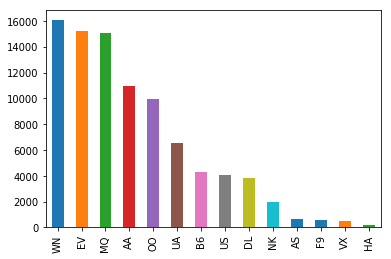

In [14]:
# Take a closer look at cancellations
df_cancelled = df.loc[df["CANCELLED"] == 1]
df_cancelled["AIRLINE"].value_counts().plot(kind="bar")

Text(0,0.5,'Counts')

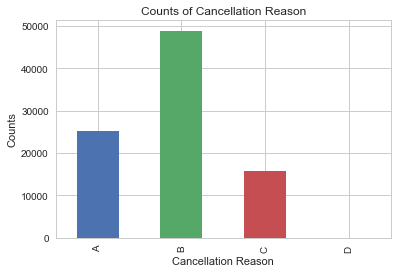

In [66]:
ax = df_cancelled["CANCELLATION_REASON"].value_counts().sort_index().\
    plot(kind="bar", title="Counts of Cancellation Reason")
ax.set_xlabel("Cancellation Reason")
ax.set_ylabel("Counts")

Text(0,0.5,'Counts')

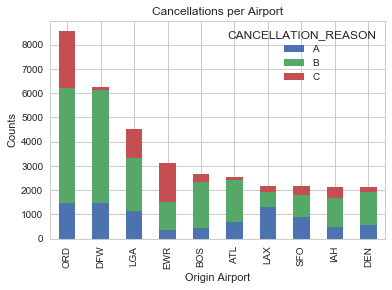

In [85]:
# get the counts forairports and cancellation reason
result = df_cancelled.groupby(["ORIGIN_AIRPORT", "CANCELLATION_REASON"])["ORIGIN_AIRPORT"].count()
# Put Cancellation Reason as the column headers
result = result.unstack("CANCELLATION_REASON").fillna(0)
# Add total to get top 10 airports with cancellations
result["total"] = result.sum(axis=1)
result = result.nlargest(10, "total")

ax = result[["A", "B", "C"]].plot(kind="bar", stacked=True, title="Cancellations per Airport")
ax.set_xlabel("Origin Airport")
ax.set_ylabel("Counts")

In [35]:
df_cancelled_weather = df_cancelled.loc[df_cancelled["CANCELLATION_REASON"] == "B"]

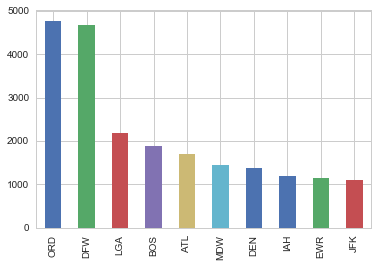

In [36]:
# Top 10 origin airports with the most weather cancellations in 2015
df_cancelled_weather["ORIGIN_AIRPORT"].value_counts().nlargest(10).plot(kind="bar")

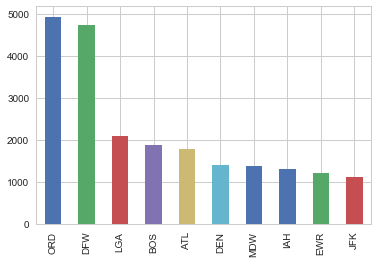

In [37]:
# Top 10 Destination Airports with cancellations due to weather
df_cancelled_weather["DESTINATION_AIRPORT"].value_counts().nlargest(10).plot(kind="bar")

In [17]:
# Reference https://seaborn.pydata.org/tutorial/categorical.html
sns.set(style="whitegrid", color_codes=True)
sns.violinplot(x="SCHEDULED_DEPARTURE", y="AIRLINE", data=df_cancelled)

TypeError: invalid type promotion

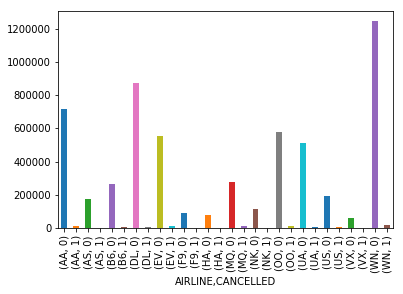

In [81]:
# df["CANCELLED"].value_counts().plot(kind="bar")
df.groupby(by="AIRLINE").CANCELLED.value_counts().plot(kind="bar")

Another issue with merging these two datasets is the level of specificity in the date and time for our date variables.
The weather data only goes down to the hour whereas the flights data goes down to the minute.  We intend to merge the 
data based on the date and time.  To do this we will create a new Scheduled departure time that gets rounded to the 
nearest hour:

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


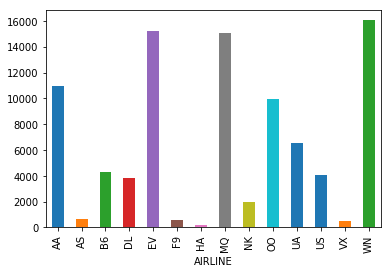

In [75]:
df_cancelled.groupby(by=["AIRLINE"]).CANCELLED.sum().plot(kind="bar")
# ad = airline_data.DISTANCE.sum()
# adp = ad.plot(kind="bar")

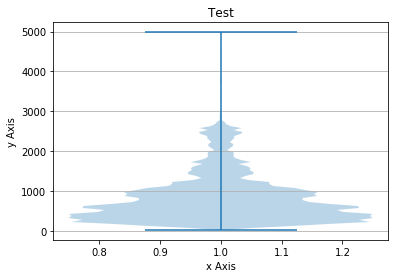

In [8]:
fig, axes = plt.subplots()
axes.violinplot(dataset=df["DISTANCE"])
axes.set_title("Test")
axes.yaxis.grid(True)
axes.set_xlabel('x Axis')
axes.set_ylabel('y Axis')

plt.show()

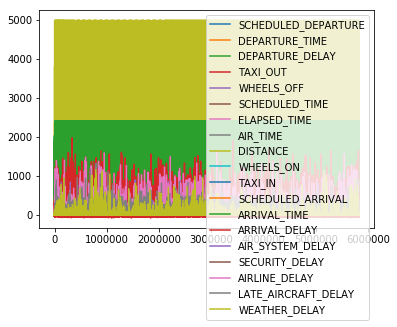

In [9]:
df[CONTINUOUS_VARIABLES].plot()

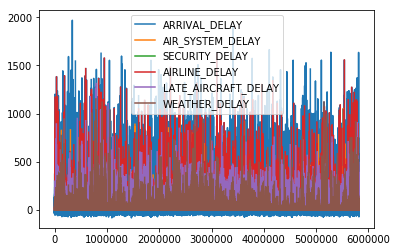

In [10]:
delay_times = df[DELAY_VARIABLES]
delay_times.plot()

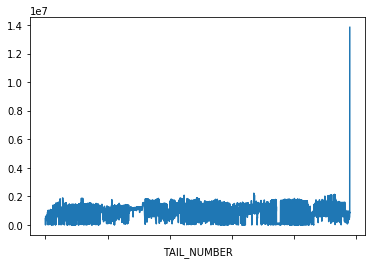

In [14]:
total_flight_distance = df[["DISTANCE"] + IDENTIFICATION_VARIABLES].groupby(by="TAIL_NUMBER")
tfd = total_flight_distance.DISTANCE.sum()
ax = tfd.plot()

In [15]:
df.AIRLINE.nunique()

14

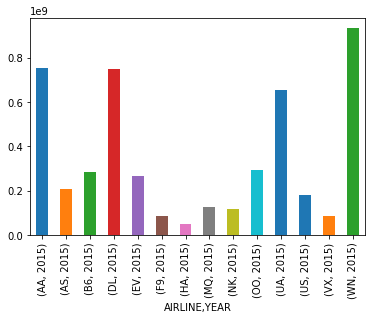

In [19]:
airline_data = df.groupby(by=["AIRLINE"])
ad = airline_data.DISTANCE.sum()
adp = ad.plot(kind="bar")

In [69]:
df_cancelled.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCH_DEP_DT


In [88]:
filename = r"C:\DataMining\chicago2015.csv"
df_weatherData = pd.read_csv(filename, dtype=object)
df_weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4448 entries, 0 to 4447
Data columns (total 28 columns):
dt                     4448 non-null object
dt_iso                 4448 non-null object
city_id                4448 non-null object
city_name              0 non-null object
lat                    0 non-null object
lon                    0 non-null object
temp                   4448 non-null object
temp_min               4448 non-null object
temp_max               4448 non-null object
pressure               4448 non-null object
sea_level              0 non-null object
grnd_level             0 non-null object
humidity               4448 non-null object
wind_speed             4448 non-null object
wind_deg               4448 non-null object
rain_1h                694 non-null object
rain_3h                10 non-null object
rain_24h               0 non-null object
rain_today             0 non-null object
snow_1h                37 non-null object
snow_3h                0 non-null objec

From the previous data cleaning, we found that the SCHEDULED_DEPARTURE timezone is that of the origin airport.  
We also calculated the departure and arrival times with respect to the origin airport.  Lastly the airport with
the most weather cancellations was Chicago.
Therefore, our weather analysis will focus on the Origin Airport for Chicago.

In order to merge these two datasets, we need to match the date and time and ensure they are in the same timezone.  The weather data date variables are given in UTC time based on the dt_iso variable and the chicago flights subset is given in CST.  In order to convert to Chicago's timezone we need to subtract 5 hours:

In [ ]:
# We subtract 5 hours to convert to CST/ Chicago Time.
df_weatherData["dt"] = df_weatherData["dt"].astype(np.int64)
df_weatherData["dt_datetime"] = pd.to_datetime(df_weatherData["dt"] - 5*60*60, unit="s")

In [105]:
df_weatherData[["dt_iso", "dt_datetime"]].head()

,dt_iso,dt_datetime
0,2015-06-12 01:00:00 +0000 UTC,2015-06-11 20:00:00
1,2015-06-12 23:00:00 +0000 UTC,2015-06-12 18:00:00
2,2015-06-13 01:00:00 +0000 UTC,2015-06-12 20:00:00
3,2015-06-13 02:00:00 +0000 UTC,2015-06-12 21:00:00
4,2015-06-14 02:00:00 +0000 UTC,2015-06-13 21:00:00


In [127]:
# The subset of the filghts data will consist of flights with ORIGIN_AIRPORT = ORD
df_ChicagoOrigin = df.loc[df["ORIGIN_AIRPORT"] == "ORD"]

Another issue with merging these two datasets is the level of specificity in the date and time for our date variables.
The weather data only goes down to the hour whereas the flights data goes down to the minute.  We intend to merge the 
data based on the date and time.  To do this we will create a new Scheduled departure time that gets rounded to the 
nearest hour:

In [139]:
import datetime
# Suppress this warning as this is not the use case for it
pd.options.mode.chained_assignment = None
# For safety
df_ChicagoOrigin = df_ChicagoOrigin.dropna(subset=["SCHEDULED_DEPARTURE"])
# round the Scheduled_Departure to the nearest hour
df_ChicagoOrigin["SCHD_DPRT_rounded"] = df_ChicagoOrigin["SCHEDULED_DEPARTURE"].apply(lambda x: datetime.datetime(
    x.year, x.month, x.day, round(float(x.hour) + float(x.minute)/60) % 24))

In [140]:
df_ChicagoOrigin[["SCHD_DPRT_rounded", "SCHEDULED_DEPARTURE"]].head()

,SCHD_DPRT_rounded,SCHEDULED_DEPARTURE
56,2015-01-01 05:00:00,2015-01-01 05:00:00
63,2015-01-01 05:00:00,2015-01-01 05:10:00
89,2015-01-01 06:00:00,2015-01-01 05:30:00
93,2015-01-01 06:00:00,2015-01-01 05:33:00
100,2015-01-01 06:00:00,2015-01-01 05:35:00


In [143]:
df_CHI_Origin_Weather_m = pd.merge(df_ChicagoOrigin, df_weatherData, left_on="SCHD_DPRT_rounded", right_on="dt_datetime")
df_CHI_Origin_Weather_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136291 entries, 0 to 136290
Data columns (total 57 columns):
YEAR                   136291 non-null object
MONTH                  136291 non-null object
DAY                    136291 non-null object
DAY_OF_WEEK            136291 non-null object
AIRLINE                136291 non-null object
FLIGHT_NUMBER          136291 non-null object
TAIL_NUMBER            135744 non-null object
ORIGIN_AIRPORT         136291 non-null object
DESTINATION_AIRPORT    136291 non-null object
SCHEDULED_DEPARTURE    136291 non-null datetime64[ns]
DEPARTURE_TIME         132251 non-null datetime64[ns]
DEPARTURE_DELAY        132251 non-null timedelta64[ns]
SCHEDULED_TIME         136291 non-null timedelta64[ns]
ELAPSED_TIME           131596 non-null timedelta64[ns]
DISTANCE               136291 non-null object
SCHEDULED_ARRIVAL      136291 non-null datetime64[ns]
ARRIVAL_TIME           131596 non-null datetime64[ns]
ARRIVAL_DELAY          131596 non-null timedelta